Student name: Felix Mburu Njoroge

Data Science Part time 06


Business problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.

Objectives

You are charged with exploring what types of films are currently doing the best at the box office.
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions to use using the data sets

1. What are the most voted movies and highly rated movie types?
2. What movie types have the highest average domestic gross and foreign gross income
3. What movie types are highest rated overall.

Data sets to use:

imdb.title.basics

imdb.title.ratings

bom.movie_gross

**DATA LOADING**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the first data set with details on gross income
df1 = pd.read_csv("/content/bom.movie_gross.csv")

In [3]:
# data inspection
print(df1.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [5]:
#load the 2nd data set title.basics.csv with details on runtime
df2 = pd.read_csv('/content/title.basics.csv')

**DATA INSPECTION**

In [6]:
# inspect
print(df2.head())

      tconst                            title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0      2013.0            175.0    Action,Crime,Drama  
1      2019.0            114.0       Biography,Drama  
2      2018.0            122.0                 Drama  
3      2018.0              NaN          Comedy,Drama  
4      2017.0             80.0  Comedy,Drama,Fantasy  


In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86878 entries, 0 to 86877
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           86878 non-null  object 
 1   title            86877 non-null  object 
 2   original_title   86869 non-null  object 
 3   start_year       86877 non-null  float64
 4   runtime_minutes  72005 non-null  float64
 5   genres           84630 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.0+ MB
None


In [8]:
# load the third data set with rating and votes
df3 =pd.read_csv('/content/title.ratings.csv')

In [9]:
print(df3.head())

       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [10]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [11]:
# merge datasets
# merge df1 and df 2

merged_df1 = pd.merge(df1, df2, on='title')
merged_df1.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi"


In [12]:
#merge the newly merged data frame to df3
all_merged_df = pd.merge(merged_df1, df3, on = 'tconst')
all_merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [13]:
#inspect the newly merged data set

all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2597 non-null   object 
 1   studio           2595 non-null   object 
 2   domestic_gross   2576 non-null   float64
 3   foreign_gross    1608 non-null   object 
 4   year             2597 non-null   int64  
 5   tconst           2597 non-null   object 
 6   original_title   2597 non-null   object 
 7   start_year       2597 non-null   float64
 8   runtime_minutes  2560 non-null   float64
 9   genres           2593 non-null   object 
 10  averagerating    2597 non-null   float64
 11  numvotes         2597 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 263.8+ KB


In [14]:
#checking descriptive statistics
all_merged_df.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,2.576000e+03,2597.000000,2597.000000,2560.000000,2597.000000,2.597000e+03
mean,3.292019e+07,2013.699653,2013.243743,106.886719,6.452214,6.902101e+04
std,7.008290e+07,2.272781,2.209441,19.854740,0.987042,1.328612e+05
min,1.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.510000e+05,2012.000000,2011.000000,94.000000,5.900000,3.231000e+03
50%,2.600000e+06,2014.000000,2013.000000,104.000000,6.500000,1.705500e+04
75%,3.540000e+07,2016.000000,2015.000000,118.000000,7.100000,7.432900e+04
max,7.001000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06


In [15]:
# calling the merged dataframe df to make it easier to call
df = all_merged_df

Now that the data set is merged, we can clean it at once.


**DATA CLEANING**

1. Foreign gross is the wrong data type. It is an object, rather than a float.



In [17]:
df['foreign_gross']= df['foreign_gross'].astype(float)

ValueError: could not convert string to float: '1,019.4'

In [18]:
# need to remove commas before converting to a float
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype(float)

In [19]:
#foreign gross is now a float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2597 non-null   object 
 1   studio           2595 non-null   object 
 2   domestic_gross   2576 non-null   float64
 3   foreign_gross    1608 non-null   float64
 4   year             2597 non-null   int64  
 5   tconst           2597 non-null   object 
 6   original_title   2597 non-null   object 
 7   start_year       2597 non-null   float64
 8   runtime_minutes  2560 non-null   float64
 9   genres           2593 non-null   object 
 10  averagerating    2597 non-null   float64
 11  numvotes         2597 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 263.8+ KB


2. Check for and address missing values

In [20]:
#check for missing values

print(df.isnull().sum())

title                0
studio               2
domestic_gross      21
foreign_gross      989
year                 0
tconst               0
original_title       0
start_year           0
runtime_minutes     37
genres               4
averagerating        0
numvotes             0
dtype: int64


In [21]:
# create a function to check the percentage of missing values
def missing_values(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(all_merged_df)
missing_data

,index,Missing Values,Percentage
0,foreign_gross,989,0.380824
1,runtime_minutes,37,0.014247
2,domestic_gross,21,0.008086
3,genres,4,0.001540
4,studio,2,0.000770


Foreign gross is the wrong data type. It is an object, rather than a float.

Foreign_gross has 38.1% missing values which is very significant. This should be addressed.

The percentage of missing values in runtime_minutes, domestic_gross, genres and studios is insignificant. It therefore does not need to be addressed.

Text(0.5, 1.0, 'Distribution Before Imputation')

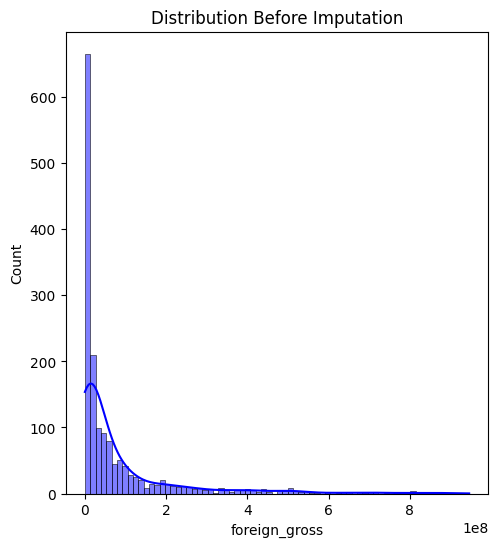

In [22]:
# The information in the foreign column is important
# Dropping it would lead to significant loss of information
# It is therefore better to impute
# imputing can be done using the mean or median depending on the distribution
# If it's a normal distribution we can use the mean
# If it's a skewed distribution we can use the median

# Create a figure with dimensions 12x6 inches
plt.figure(figsize=(12, 6))

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Plot the histogram with KDE of the 'bmi' column from stroke_data, dropping missing values
sns.histplot(df['foreign_gross'], kde=True, color='blue')

# Set title for the subplot
plt.title('Distribution Before Imputation')

In [23]:
#this is a skewed distribution so we impute using the median

df['foreign_gross'].fillna(df['foreign_gross'].median(), inplace = True)

In [24]:
#check for missing values after imputation

print(df.isnull().sum())

title               0
studio              2
domestic_gross     21
foreign_gross       0
year                0
tconst              0
original_title      0
start_year          0
runtime_minutes    37
genres              4
averagerating       0
numvotes            0
dtype: int64


Text(0.5, 1.0, 'Distribution After Imputation')

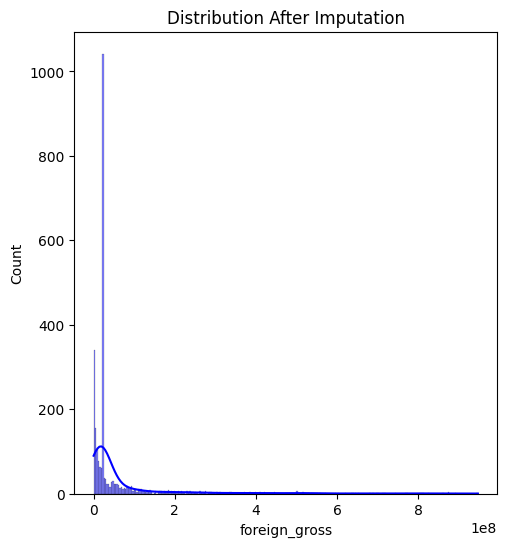

In [25]:
# Create a figure with dimensions 12x6 inches
plt.figure(figsize=(12, 6))

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Plot the histogram with KDE of the 'bmi' column from stroke_data, dropping missing values
sns.histplot(df['foreign_gross'], kde=True, color='blue')

# Set title for the subplot
plt.title('Distribution After Imputation')

3. Dealing with outliers

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2597 non-null   object 
 1   studio           2595 non-null   object 
 2   domestic_gross   2576 non-null   float64
 3   foreign_gross    2597 non-null   float64
 4   year             2597 non-null   int64  
 5   tconst           2597 non-null   object 
 6   original_title   2597 non-null   object 
 7   start_year       2597 non-null   float64
 8   runtime_minutes  2560 non-null   float64
 9   genres           2593 non-null   object 
 10  averagerating    2597 non-null   float64
 11  numvotes         2597 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 263.8+ KB


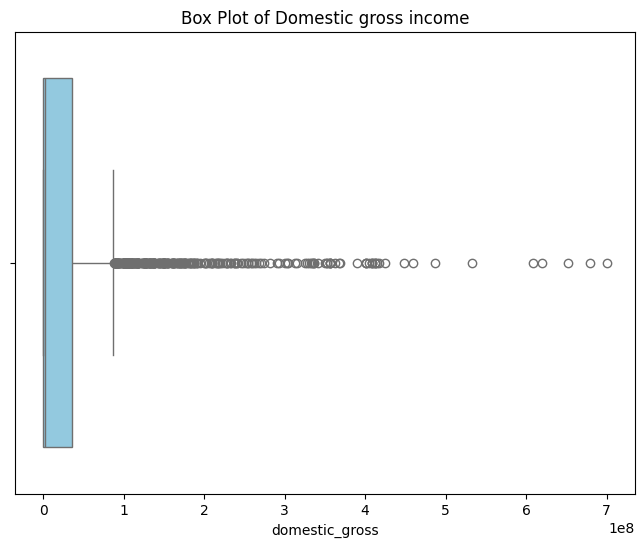

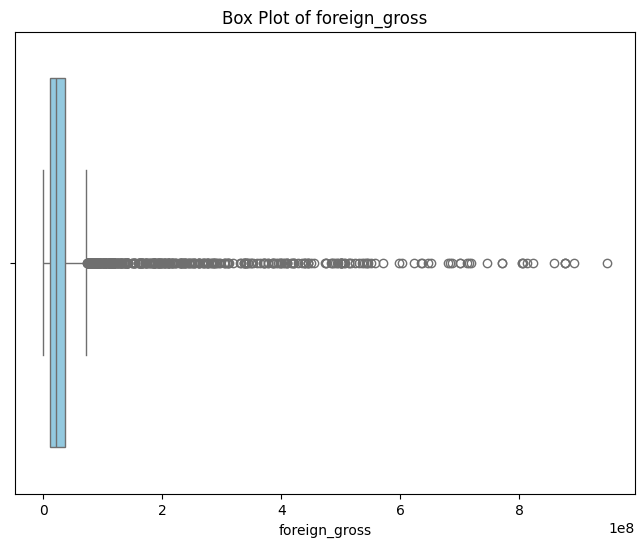

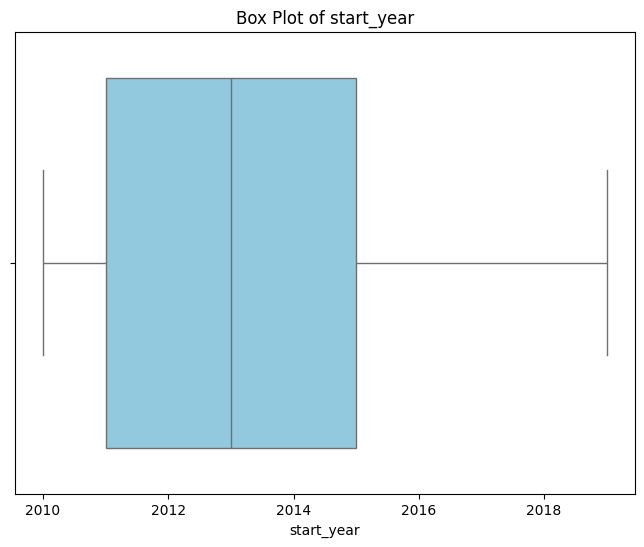

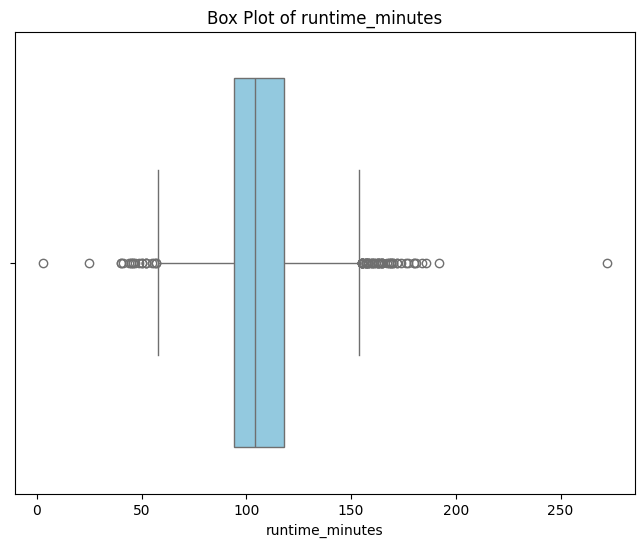

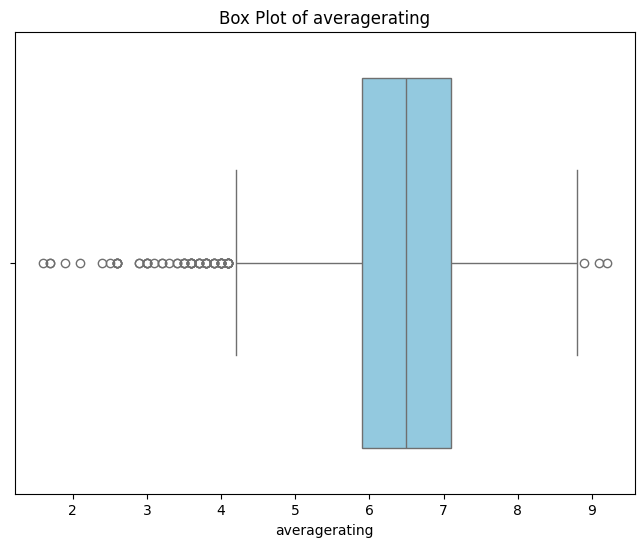

In [27]:
# Check for outliers using box plots

# First we identify the outliers by using box plots
# domestic_gross column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['domestic_gross'], color='skyblue')
plt.title('Box Plot of Domestic gross income')
plt.show()

# foreign_gross column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['foreign_gross'], color='skyblue')
plt.title('Box Plot of foreign_gross')
plt.show()

# start_year column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['start_year'], color='skyblue')
plt.title('Box Plot of start_year')
plt.show()

# runtime_minutes column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['runtime_minutes'], color='skyblue')
plt.title('Box Plot of runtime_minutes')
plt.show()

# averagerating column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['averagerating'], color='skyblue')
plt.title('Box Plot of averagerating')
plt.show()

Although there are outliers visualized above, the context within which this data is collected is important. Movies that are doing better than average in terms of income and ratings are worth noting. This is valuable information that should be kept as part of the analysis.
There is one outlier in run time that is isolated and likely to alter the analysis.

In [28]:
# Dealing with outliers
# cap run time outliers

# Calculate IQR for the 'run time' column
Q1 = df['runtime_minutes'].quantile(0.25)
Q3 = df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['runtime_minutes'] < lower_bound) | (df['runtime_minutes'] > upper_bound)]

# Capping outliers to the upper and lower bounds
df['runtime_minutes'] = df['runtime_minutes'].clip(lower=lower_bound, upper=upper_bound)

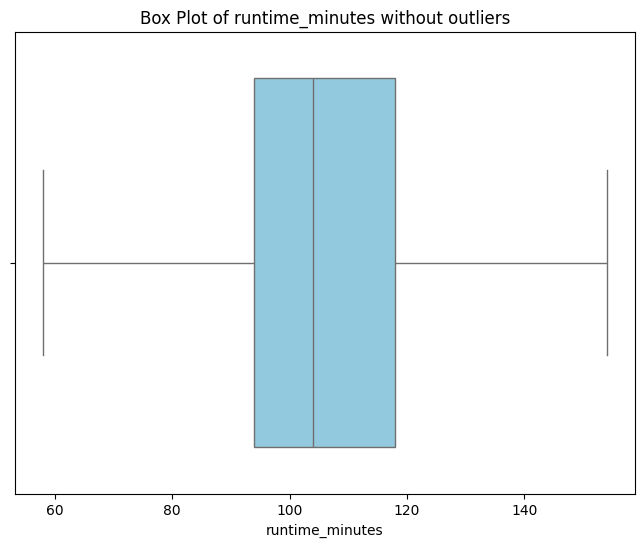

In [29]:
# runtime_minutes column after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['runtime_minutes'], color='skyblue')
plt.title('Box Plot of runtime_minutes without outliers')
plt.show()

4. Check for and remove duplicates

In [30]:
# Check for duplicate rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year, tconst, original_title, start_year, runtime_minutes, genres, averagerating, numvotes]
Index: []


There are no duplicates

**EXPLORATORY DATA ANALYSIS**

In [31]:
#generate descriptive statistics for numerical variables
df.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,2.576000e+03,2.597000e+03,2597.000000,2597.000000,2560.000000,2597.000000,2.597000e+03
mean,3.292019e+07,5.742647e+07,2013.699653,2013.243743,106.716406,6.452214,6.902101e+04
std,7.008290e+07,1.146123e+08,2.272781,2.209441,18.603282,0.987042,1.328612e+05
min,1.000000e+02,6.000000e+02,2010.000000,2010.000000,58.000000,1.600000,5.000000e+00
25%,1.510000e+05,1.240000e+07,2012.000000,2011.000000,94.000000,5.900000,3.231000e+03
50%,2.600000e+06,2.130000e+07,2014.000000,2013.000000,104.000000,6.500000,1.705500e+04
75%,3.540000e+07,3.660000e+07,2016.000000,2015.000000,118.000000,7.100000,7.432900e+04
max,7.001000e+08,9.464000e+08,2018.000000,2019.000000,154.000000,9.200000,1.841066e+06


In [42]:
# Count the number of unique genres
num_genres = df['genres'].nunique()

print("Number of genres:", num_genres)

Number of genres: 302


Group by Genres and calculate descriptive statistics of each genre

In [39]:
# Group by 'Category' and calculate various statistics
genre_stats = df.groupby('genres').agg({
    'averagerating': 'mean',                # Mean rating
    'domestic_gross': 'mean',         # mean domestic gross income
    'foreign_gross' : 'mean',          # mean foreign_gross
    'runtime_minutes': 'mean',      # Mean runtime
    'numvotes':'mean'   #mean Numvotes
})

print(genre_stats)

                            averagerating  domestic_gross  foreign_gross  \
genres                                                                     
Action                           6.092857    1.234291e+07   2.261429e+07   
Action,Adventure                 5.866667    5.408333e+04   1.487450e+07   
Action,Adventure,Animation       7.331579    1.145756e+08   2.247211e+08   
Action,Adventure,Biography       7.133333    6.960967e+07   1.865333e+08   
Action,Adventure,Comedy          6.277778    9.626649e+07   2.058963e+08   
...                                   ...             ...            ...   
Romance,Thriller                 5.850000    2.736500e+05   6.560500e+06   
Sci-Fi                           4.200000    4.126000e+08   4.093000e+08   
Sport                            7.900000    5.300000e+06   2.130000e+07   
Thriller                         5.690909    2.394316e+07   4.349987e+07   
Thriller,Western                 6.400000    2.110000e+04   3.000000e+05   

           

In [43]:

# Find the genre with the highest and lowest values for each category
highest_ratings = genre_stats['averagerating'].idxmax()
lowest_ratings = genre_stats['averagerating'].idxmin()

highest_domestic_gross = genre_stats['domestic_gross'].idxmax()
lowest_domestic_gross = genre_stats['domestic_gross'].idxmin()

highest_foreign_gross = genre_stats['foreign_gross'].idxmax()
lowest_foreign_gross = genre_stats['foreign_gross'].idxmin()

longest_runtime = genre_stats['runtime_minutes'].idxmax()
shortest_runtime = genre_stats['runtime_minutes'].idxmin()

most_numvotes = genre_stats['numvotes'].idxmax()
least_numvotes = genre_stats['numvotes'].idxmin()

# Print the results
print("Highest average rating genre:", highest_ratings)
print("Lowest average rating genre:", lowest_ratings)
print("Genre with highest domestic gross:", highest_domestic_gross)
print("Genre with lowest domestic gross:", lowest_domestic_gross)
print("Genre with highest foreign gross:", highest_foreign_gross)
print("Genre with lowest foreign gross:", lowest_foreign_gross)
print("Genre with longest runtime:", longest_runtime)
print("Genre with shortest runtime:", shortest_runtime)
print("Genre with most numvotes:", most_numvotes)
print("Genre with least numvotes:", least_numvotes)


Highest average rating genre: Adventure,Drama,Sci-Fi
Lowest average rating genre: Comedy,Thriller
Genre with highest domestic gross: Sci-Fi
Genre with lowest domestic gross: Comedy,Thriller
Genre with highest foreign gross: Adventure,Drama,Sport
Genre with lowest foreign gross: Biography,Documentary,Thriller
Genre with longest runtime: Action,Drama,Sport
Genre with shortest runtime: Documentary,Drama,Romance
Genre with most numvotes: Adventure,Drama,Sci-Fi
Genre with least numvotes: Documentary,Drama,Romance


In [44]:
# Find the top 5 and bottom 5 genres for each category
top_bottom_genres = {}

for column in genre_stats.columns:
    top_bottom_genres[column] = {
        'top_5': genre_stats[column].nlargest(5),
        'bottom_5': genre_stats[column].nsmallest(5)
    }

# Print the results
for category, values in top_bottom_genres.items():
    print(f"Category: {category}")
    print("Top 5 Genres:")
    print(values['top_5'])
    print("\nBottom 5 Genres:")
    print(values['bottom_5'])
    print("\n")

Category: averagerating
Top 5 Genres:
genres
Adventure,Drama,Sci-Fi            8.3
Biography,Documentary,Family      8.3
Comedy,Documentary,Drama          8.2
Fantasy                           8.2
Biography,Documentary,Thriller    8.1
Name: averagerating, dtype: float64

Bottom 5 Genres:
genres
Comedy,Thriller           2.1
Comedy,Family,Sci-Fi      2.6
Drama,Mystery,Western     3.4
Comedy,Musical,Romance    3.5
Animation,Family          4.0
Name: averagerating, dtype: float64


Category: domestic_gross
Top 5 Genres:
genres
Sci-Fi                     4.126000e+08
Adventure,Drama,Sport      4.007000e+08
Action,Adventure,Sci-Fi    2.345681e+08
Adventure,Drama,Sci-Fi     2.082000e+08
Documentary,Drama,Sport    2.067250e+08
Name: domestic_gross, dtype: float64

Bottom 5 Genres:
genres
Comedy,Thriller           800.0
Fantasy,Thriller         1400.0
Action,Horror,Mystery    2800.0
Comedy,Crime,History     4800.0
Comedy,Crime,Mystery     5000.0
Name: domestic_gross, dtype: float64


Category:

Visualization

<ipython-input-45-4613d4dc1acf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['averagerating'].nlargest(10), y=genre_stats['averagerating'].nlargest(10).index, palette='viridis')


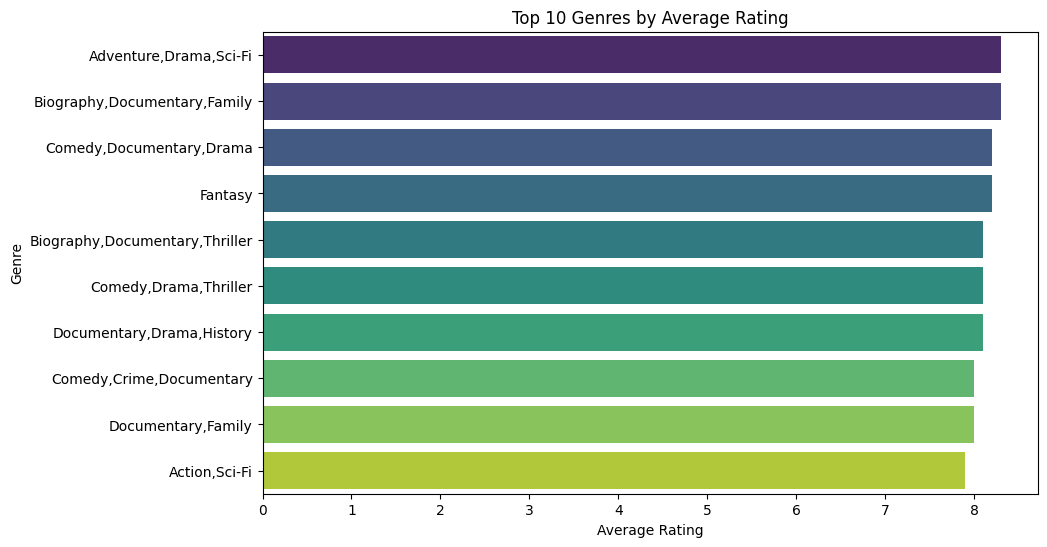

In [45]:
# Create a bar plot for average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['averagerating'].nlargest(10), y=genre_stats['averagerating'].nlargest(10).index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Rating')
plt.show()

<ipython-input-46-f0e63f3823fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['domestic_gross'].nlargest(10), y=genre_stats['domestic_gross'].nlargest(10).index, palette='magma')


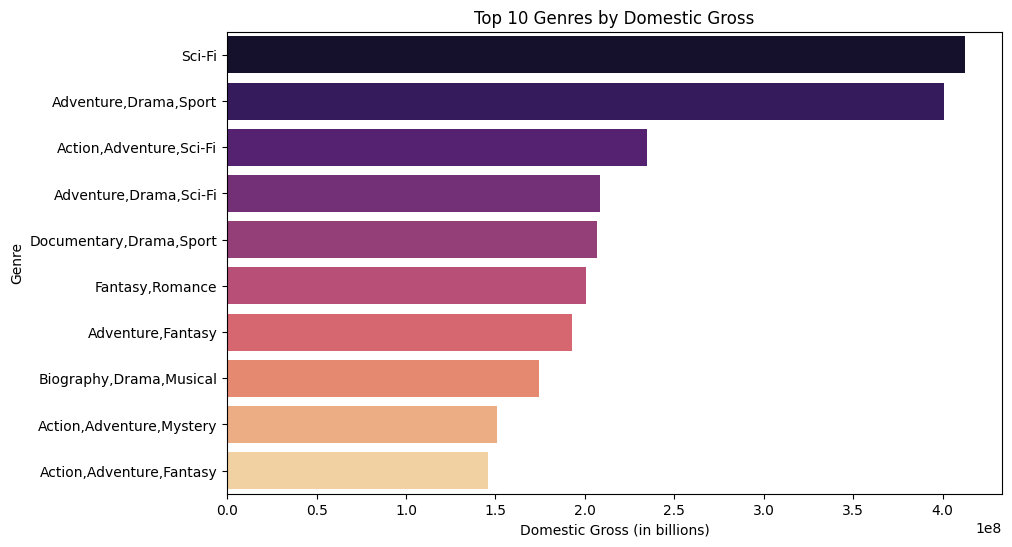

In [46]:
# Create a bar plot for domestic gross
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['domestic_gross'].nlargest(10), y=genre_stats['domestic_gross'].nlargest(10).index, palette='magma')
plt.xlabel('Domestic Gross (in billions)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Domestic Gross')
plt.show()

<ipython-input-48-49ee34da74cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['runtime_minutes'].nlargest(10), y=genre_stats['runtime_minutes'].nlargest(10).index, palette='inferno')


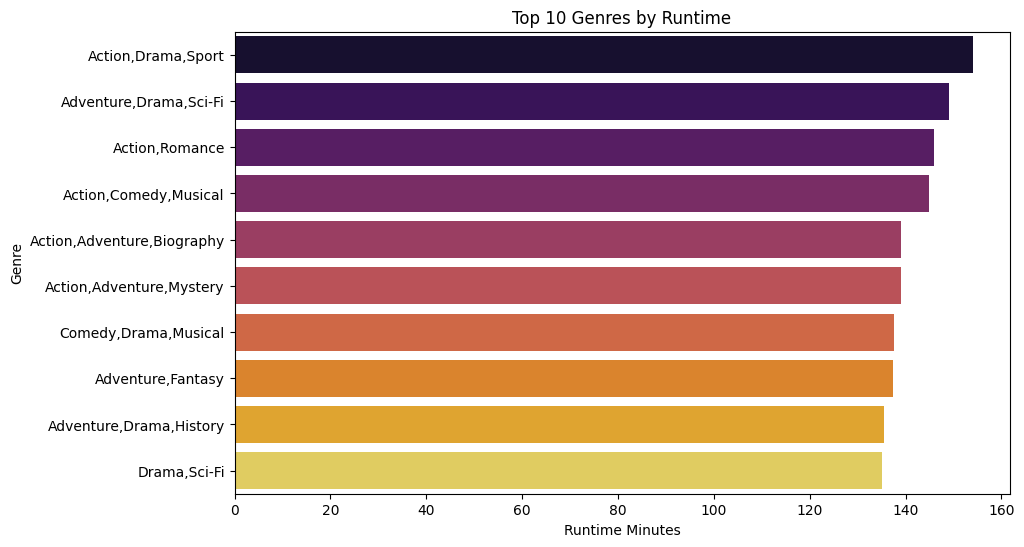

In [48]:
# Create a bar plot for runtime minutes
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['runtime_minutes'].nlargest(10), y=genre_stats['runtime_minutes'].nlargest(10).index, palette='inferno')
plt.xlabel('Runtime Minutes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Runtime')
plt.show()

<ipython-input-64-eb9b5b9ff160>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['foreign_gross'].nlargest(10), y=genre_stats['foreign_gross'].nlargest(10).index, palette='magma')


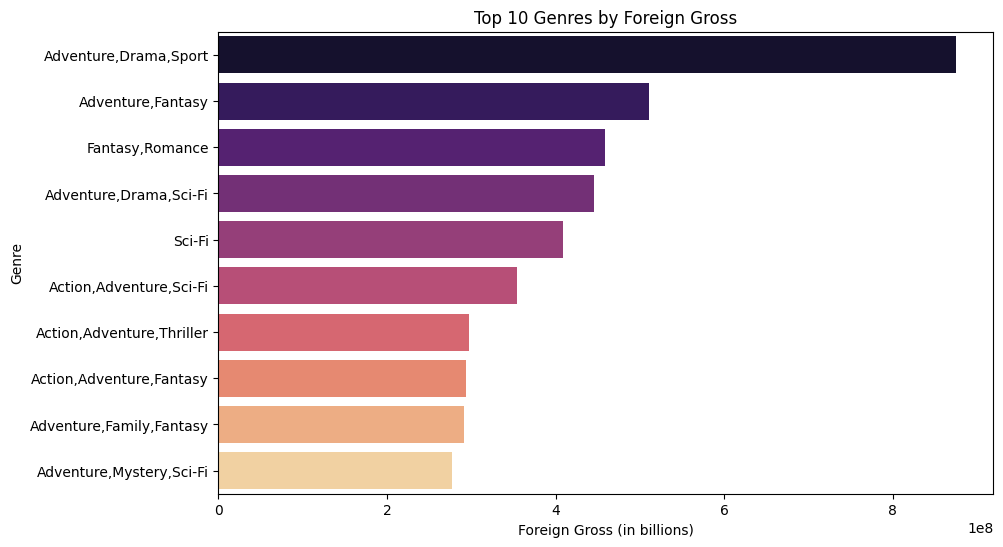

In [64]:
# Create a bar plot for foreign gross
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['foreign_gross'].nlargest(10), y=genre_stats['foreign_gross'].nlargest(10).index, palette='magma')
plt.xlabel('Foreign Gross (in billions)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Foreign Gross')
plt.show()

<ipython-input-50-a2da794a3365>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['numvotes'].nlargest(10), y=genre_stats['numvotes'].nlargest(10).index, palette='cividis')


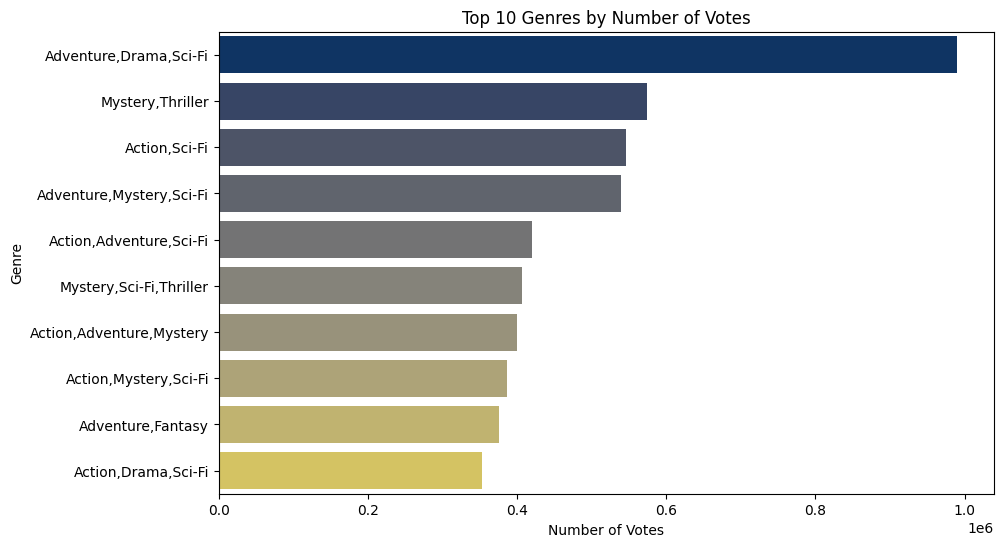

In [50]:
# Create a bar plot for number of votes
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['numvotes'].nlargest(10), y=genre_stats['numvotes'].nlargest(10).index, palette='cividis')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Votes')
plt.show()

In [60]:
# Finding out the best performing movie overall (across all categories)
# Assign equal weight to each category
weight_rating = 0.25
weight_gross = 0.25
weight_runtime = 0.25
weight_votes = 0.25

# Calculate performance metric for each movie
df['Performance_Metric'] = (weight_rating * df['averagerating'] +
                             weight_gross * (df['domestic_gross'] + df['foreign_gross']) / 2 +
                             weight_runtime * df['runtime_minutes'] +
                             weight_votes * df['numvotes'])

# Rank movies based on performance metric
ranked_movies = df.sort_values(by='Performance_Metric', ascending=False)

# Select the top-performing movie
best_performing_movie = ranked_movies.iloc[0]

# Print the best-performing movie
# Print the best-performing movie
# Print the best-performing movie's performance metric
print("Best Performing Movie:")
print(best_performing_movie[['title', 'Performance_Metric']])

Best Performing Movie:
title                 Avengers: Age of Ultron
Performance_Metric              175841435.575
Name: 1554, dtype: object


In [61]:
# Group by genre and calculate the mean performance metric for each genre
genre_performance = df.groupby('genres')['Performance_Metric'].mean()

# Find the genre with the highest mean performance metric
best_genre = genre_performance.idxmax()
best_genre_performance = genre_performance.max()

# Print the best performing genre and its performance metric
print(f"Best Performing Genre: {best_genre}")
print(f"Performance Metric: {best_genre_performance}")

Best Performing Genre: Adventure,Drama,Sport
Performance Metric: 159565602.55


In [62]:
#Finding the top 5 performing genres overall
# Sort the genres by their mean performance metric in descending order and select the top 5
top_5_genres = genre_performance.nlargest(5)

# Print the top 5 performing genres and their metrics
print("Top 5 Performing Genres:")
for genre, metric in top_5_genres.items():
    print(f"Genre: {genre}, Performance Metric: {metric}")

Top 5 Performing Genres:
Genre: Adventure,Drama,Sport, Performance Metric: 159565602.55
Genre: Sci-Fi, Performance Metric: 102737521.05
Genre: Adventure,Fantasy, Performance Metric: 88098145.33333333
Genre: Fantasy,Romance, Performance Metric: 82378432.35
Genre: Adventure,Drama,Sci-Fi, Performance Metric: 81966220.575


<ipython-input-63-6f6184584fca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette='viridis')


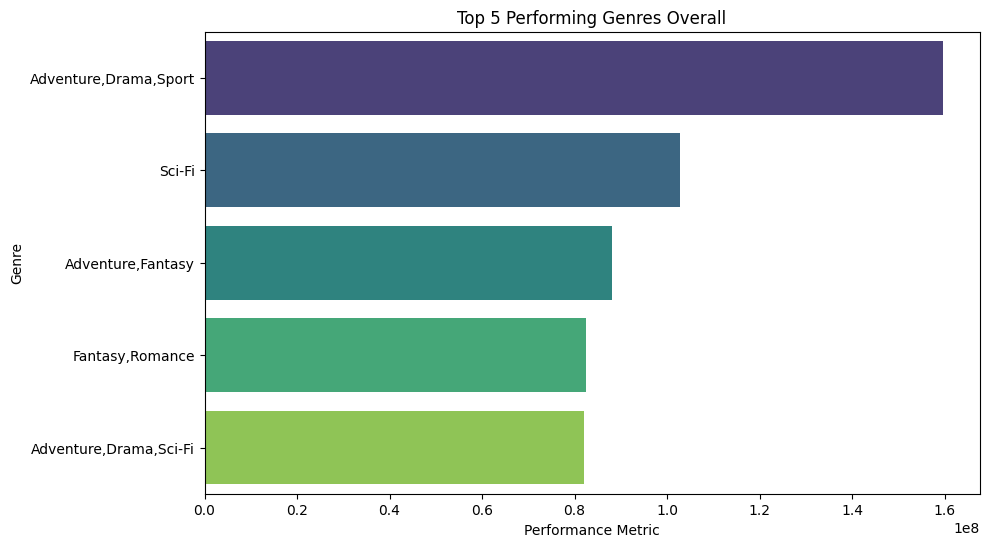

In [63]:
# Create a bar plot for the top 5 performing genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette='viridis')
plt.xlabel('Performance Metric')
plt.ylabel('Genre')
plt.title('Top 5 Performing Genres Overall')
plt.show()


CORRELATION ANALYSIS

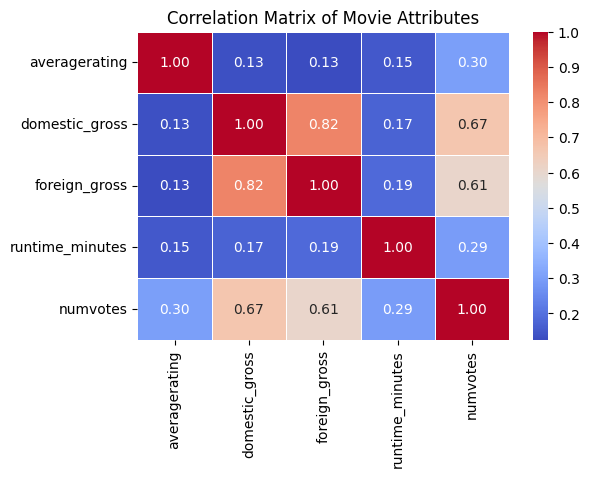

In [53]:
# Select numerical columns for correlation analysis
numerical_cols = ['averagerating', 'domestic_gross', 'foreign_gross', 'runtime_minutes', 'numvotes']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Movie Attributes')
plt.show()

**SUMMARY AND INSIGHTS**

  The top genre of movies by average rating are (Adventure, Drama, Scifi) and
  (Biography, Documentaries, Family) which both have an average rating of 8.3

  The top genre by domestic gross income is Sci-Fi

  The top genre by foreign gross is Adventure, drama, sport

  The top genre by number of votes is Adventure, drama, sci-fi

  The top genre by run time is Action, Drama, Sport

  Overall the top performing genre is adventure, drama, sport

  There is a positive correlation between number of votes and gross income

  **Insight**

  Microsoft should consider making movies in the Adventure, drama, sport genre.

